In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from graspy.align import SeedlessProcrustes

In [2]:
n, d = 250, 2
def test_matching_datasets(seed=314):
    np.random.seed(seed)
    mean = np.ones(d) * 5
    cov = np.ones((d,d))*0.02 + np.eye(d)*0.8
    X = stats.multivariate_normal.rvs(mean, cov, n)
    Y = np.concatenate([X, X])
    W = stats.ortho_group.rvs(d)
    Y = Y @ W

    aligner = SeedlessProcrustes(initialization="2d", initial_Q=np.eye(3))
    Q = aligner.fit(X, Y).Q_X
    np.linalg.norm(Y.mean(axis=0) - (X@Q).mean(axis=0)) < 0.01
    return (X, Y, W, Q)

In [3]:
#%prun 
X, Y, W, Q = test_matching_datasets(seed=1233)

In [4]:
W

array([[ 0.48686936, -0.8734748 ],
       [-0.8734748 , -0.48686936]])

In [5]:
Q

array([[-0.88823116, -0.45939679],
       [ 0.45939679, -0.88823116]])

In [6]:
data = np.concatenate([X, Y, X@Q])
data = pd.DataFrame(data)
data["label"] = np.concatenate([['X']*n, ['Y']*n*2, ['X@Q']*n])
data

,0,1,label
0,3.868882,5.320352,X
1,4.017505,4.714504,X
2,4.996966,5.390911,X
3,4.856434,4.543345,X
4,5.423263,3.713307,X
...,...,...,...
995,-3.292842,-5.334031,X@Q
996,-2.566792,-5.443312,X@Q
997,-0.439273,-6.255305,X@Q
998,-1.045250,-5.269262,X@Q


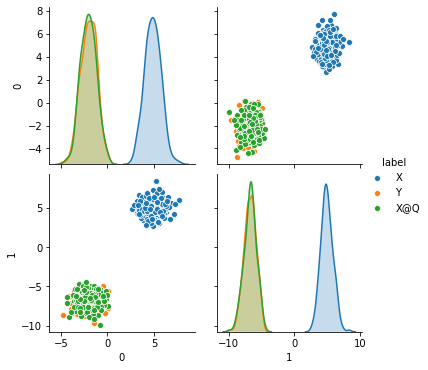

In [7]:
fig = sns.pairplot(data, hue='label')
# plt.savefig("example where we fail")

In [8]:
np.linalg.norm(Y.mean(axis=0) - (X@Q).mean(axis=0)) < 0.1

True

In [9]:
Y.mean(axis=0) - (X@Q).mean(axis=0)

array([ 0.03488851, -0.01050583])